# Trabajo de Fin de Master
Sergio Marchena
UNAV - 2024

In [1]:
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import json as json

In [105]:
file_path = 'apikey.txt'
with open(file_path, 'r') as file:
    file_contents = file.read()

api_key = file_contents

In [103]:
url = "https://api.footprint.network/api/v1/native/async"

query = " select * from token_price_5min where token_symbol = 'RIF' limit 1 "

query2 = " select date(timestamp) as Date, avg(price) as Price, token_symbol as Symbol from token_price_5min where token_symbol in ('DOC','RIF') and chain = 'Rootstock' group by 1,3 order by 1 desc limit 180 "
query2 = query2 [1:-1]
query3 = " select * from protocol_transactions where chain = 'Ethereum' " 
query4  = " select * from ethereum_transactions " 

query2 = query4 [1:-1]
print(query2)

payload = { "query": query2}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "api-key": api_key
}

response = requests.post(url, json=payload, headers=headers).json()
ok = response['message']
print(response)
execution_id = response['data']['execution_id']

print(ok)
print(execution_id)


select * from ethereum_transactions
{'message': 'success', 'code': 0, 'data': {'state': 'INIT', 'execution_id': '8529be9f-5b6b-433c-9d16-21ba4f59ac44'}}
success
8529be9f-5b6b-433c-9d16-21ba4f59ac44


In [104]:
url = 'https://api.footprint.network/api/v1/native/' + execution_id + '/results?limit=1000'

headers = {
    "accept": "application/json",
    "api-key": api_key
}

response = requests.get(url, headers=headers).json()

respuesta = response['data']['result']
print(response)

df = pd.DataFrame(respuesta)
df


{'message': 'success', 'code': 0, 'data': {'execution_id': '8529be9f-5b6b-433c-9d16-21ba4f59ac44', 'state': 'SUCCESS', 'submitted_at': '2024-05-28T00:15:31.000Z', 'expires_at': '2024-05-29T00:15:46.000Z', 'finished_at': '2024-05-28T00:15:46.000Z', 'total': '100000', 'error_message': None, 'result': [{'block_number': 15786848, 'hash': '0x8939702b332451dce59e93307cfad6476e18307615bb3b9ba1c1d2ea686d57ce', 'nonce': 2794, 'transaction_index': 12, 'from_address': '0xf8d45c9204defe8b4bd4a4961a708d4689094bbf', 'to_address': '0x7a250d5630b4cf539739df2c5dacb4c659f2488d', 'value': '150000000000000000.000000000', 'gas': 328293, 'gas_price': 26000000000, 'input': '0x7ff36ab5000000000000000000000000000000000000000000000000001ea3690cee25ae0000000000000000000000000000000000000000000000000000000000000080000000000000000000000000f8d45c9204defe8b4bd4a4961a708d4689094bbf00000000000000000000000000000000000000000000000000000183f8bf4ddd00000000000000000000000000000000000000000000000000000000000000020000000000

block_number                                               hash  nonce  \
0        15786848  0x8939702b332451dce59e93307cfad6476e18307615bb...   2794   
1        15787172  0x48fe16f777e04624049e1d8018c3a862a7b1f5acaa6c...   2803   
2        15786803  0x0e701fb15fb118907cff255b929a9f021b3d84ddd14f...   2790   
3        15786760  0x549b9ae55095dee33ab12fa3ca0a2a4ca88b5047b6c7...   2787   
4        15789498  0xc87f37c412b80deaae85ad200746ae3cb33943d91b36...   2822   
..            ...                                                ...    ...   
995      15790294  0xe682aafa3769afe317b8a0c418de775172d095bca085...     23   
996      15790736  0x897c88b031e80631b65288422efd9ad9c2fc2d3603dc...      0   
997      15786641  0x562957dfacdaf104b29a96b45d7a856d27be9d69461f...      1   
998      15786635  0xf5fc7371b1997db144c33da586b72561a69bd9bb4388...      0   
999      15788333  0x4ca2b949afab9eb2a25fb1c06a1ae85eb8f7e78a3639...      5   

     transaction_index                                from_address  \
0                   12  0xf8d45c9204defe8b4bd4a4961a708d4689094bbf   
1                    1  0xf8d45c9204defe8b4bd4a4961a708d4689094bbf   
2                   11  0xf8d45c9204defe8b4bd4a4961a708d4689094bbf   
3                   49  0xf8d45c9204defe8b4bd4a4961a708d4689094bbf   
4                    7  0xf8d45c9204defe8b4bd4a4961a708d4689094bbf   
..                 ...                                         ...   
995                 19  0xf9083346e2f548d34e95e728a2ea16663fd097eb   
996                 70  0xf9083ec80a620b277916400a3b8989b203a6d277   
997                 30  0xf90844ead812066b23a8db21df45b206d3a1bbed   
998                160  0xf90844ead812066b23a8db21df45b206d3a1bbed   
999                  9  0xf908c7c4985b327604f48a44a1c4c37e6e5e718f   

                                     to_address                         value  \
0    0x7a250d5630b4cf539739df2c5dacb4c659f2488d  150000000000000000.000000000   
1    0x7a250d5630b4cf539739df2c5dacb4c659f2488d  500000000000000000.000000000   
2    0x7a250d5630b4cf539739df2c5dacb4c659f2488d  500000000000000000.000000000   
3    0x7a250d5630b4cf539739df2c5dacb4c659f2488d                   0.000000000   
4    0x7a250d5630b4cf539739df2c5dacb4c659f2488d  300000000000000000.000000000   
..                                          ...                           ...   
995  0x115b48b11598ed081ee24dd77cde496a0696ec1f   24583570000000000.000000000   
996  0xdac17f958d2ee523a2206206994597c13d831ec7                   0.000000000   
997  0xdac17f958d2ee523a2206206994597c13d831ec7                   0.000000000   
998  0xdac17f958d2ee523a2206206994597c13d831ec7                   0.000000000   
999  0x57de441107a158d9c16ac67da4145cdcc60289a3   19692741636819217.000000000   

        gas     gas_price                                              input  \
0    328293   26000000000  0x7ff36ab5000000000000000000000000000000000000...   
1    317137  120000000000  0x7ff36ab5000000000000000000000000000000000000...   
2    366602   24000000000  0x7ff36ab5000000000000000000000000000000000000...   
3    402427   28000000000  0x791ac947000000000000000000000000000000000000...   
4    346807  124000000000  0x7ff36ab5000000000000000000000000000000000000...   
..      ...           ...                                                ...   
995   21000   45000000000                                                 0x   
996   48561   80799516440  0x095ea7b300000000000000000000000063a22a1210f0...   
997   46097   18160413410  0xa9059cbb0000000000000000000000007a7854db1aac...   
998   46097   18160413410  0xa9059cbb0000000000000000000000007a7854db1aac...   
999   21000   22930846105                                                 0x   

     ...  receipt_gas_used  receipt_contract_address receipt_root  \
0    ...             31435                      None         None   
1    ...            151714                      None         None   
2    ...            200408                      None         None   
3    

In [61]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['value'].dtype

dtype('float64')

In [86]:
new_df=df[(df['value'] > 0) & (df['block_timestamp'] > '2024-01-01')]
new_df

block_number                                               hash   nonce  \
12       19857683  0x4af39dcdba5ac7bec26b8d6f19dfdb244f61ee546f9b...       4   
13       19858364  0xd4c3712329172524140e6a0215b759c765f712c0e823...       2   
14       19858969  0x1298e1ab8a76b150530168758eb34712db98e7ef7666...    1667   
22       19858469  0x1026663e10050efddef33ca2ce308764cc09bcf70e7e...       0   
24       19858385  0x0200b5048249e97f9b0c0a358cb3fb9d4ac4ca694bec...      14   
..            ...                                                ...     ...   
976      19858085  0x8d1f46fdca477b86c15566a2d77b30cc465e27af0abb...  172689   
977      19858110  0x90e6b24284bafb721fca151553c7e2ecd35deaf4f7a8...  172691   
979      19858213  0x2a4a57ca442e54557f1ea42b46add9cf92ec36c3c3f4...       0   
989      19858794  0x41b700dedc6873f7b3ea2c89be848df44385a22dd12a...       2   
990      19858216  0x8b92567e7ce24fe7588354f140ef05090d7cdb74a067...      82   

     transaction_index                                from_address  \
12                 140  0xfc797953e70e6566288d85aca45dc3b62ccbb10a   
13                  61  0xfc7bddec59e57d47449cdb1d0a15cfba4c5b99bf   
14                 100  0xfc7d36f09f0610ca72457aaa85e933ed07629b5f   
22                 807  0xfc83dce8b59f758dc9ef65dc1921cbc9c9365cb5   
24                  90  0xfc859a9fd83ec8a94e849bf3239e483610359065   
..                 ...                                         ...   
976                 28  0xff82bf5238637b7e5e345888bab9cd99f5ebe331   
977                 33  0xff82bf5238637b7e5e345888bab9cd99f5ebe331   
979                112  0xff85dc32246e7bd400f4f22c52eff6eb59b39bc8   
989                111  0xff87b0097a9c4b087019f0ea7e0e352942931287   
990                 65  0xff87f3d81c30a7f04c76a9033da769f43df0e385   

                                     to_address         value     gas  \
12   0xfc797953e70e6566288d85aca45dc3b62ccbb10a  1.800000e+16   21000   
13   0x7ad51ba2172668d437938a5506c9411182352915  3.953371e+16   21000   
14   0xfe30a678f8dbfcd1188ff6392071cd0241e76bad  5.000000e+18   21000   
22   0x4c8d874f4a116603626e29eb4cb3ffb5ab2e35a9  9.160000e+14   21000   
24   0x3f6ce1b36e5120bbc59d0cfe8a5ac8b6464ac1f7  1.050000e+17  938925   
..                                          ...           ...     ...   
976  0xa69babef1ca67a37ffaf7a485dfff3382056e78c  8.116736e+06  228870   
977  0xa69babef1ca67a37ffaf7a485dfff3382056e78c  8.148736e+06  217670   
979  0x6774bcbd5cecef1336b5300fb5186a12ddd8b367  6.752048e+17  146049   
989  0xb4acbfe08bf5819dfb0047b41490df92b14bb0b7  9.005884e+15   21000   
990  0x6774bcbd5cecef1336b5300fb5186a12ddd8b367  2.084104e+18  219092   

      gas_price                                              input  ...  \
12   3398608974                                                 0x  ...   
13   6452064272                                                 0x  ...   
14   3601528855                                                 0x  ...   
22   3509857821                                                 0x  ...   
24   4819850841  0xb1a1a882000000000000000000000000000000000000...  ...   
..          ...                                                ...  ...   
976  4121810486  0x78e111f60000000000000000000000002c6e668d3a4b...  ...   
977  4513110886  0x78e111f6000000000000000000000000fd535c678df1...  ...   
979  4329060881  0xb2267a7b000000000000000000000000ff85dc32246e...  ...   
989  3307598145                                                 0x  ...   
990  4575679065  0xb2267a7b000000000000000000000000ff87f3d81c30...  ...   

     receipt_gas_used  receipt_contract_address receipt_root receipt_status  \
12              21000                      None         None              1   
13              21000                      None         None              1   
14              21000                      None         None              1   
22              21000                      None         None              1   
24             202109         

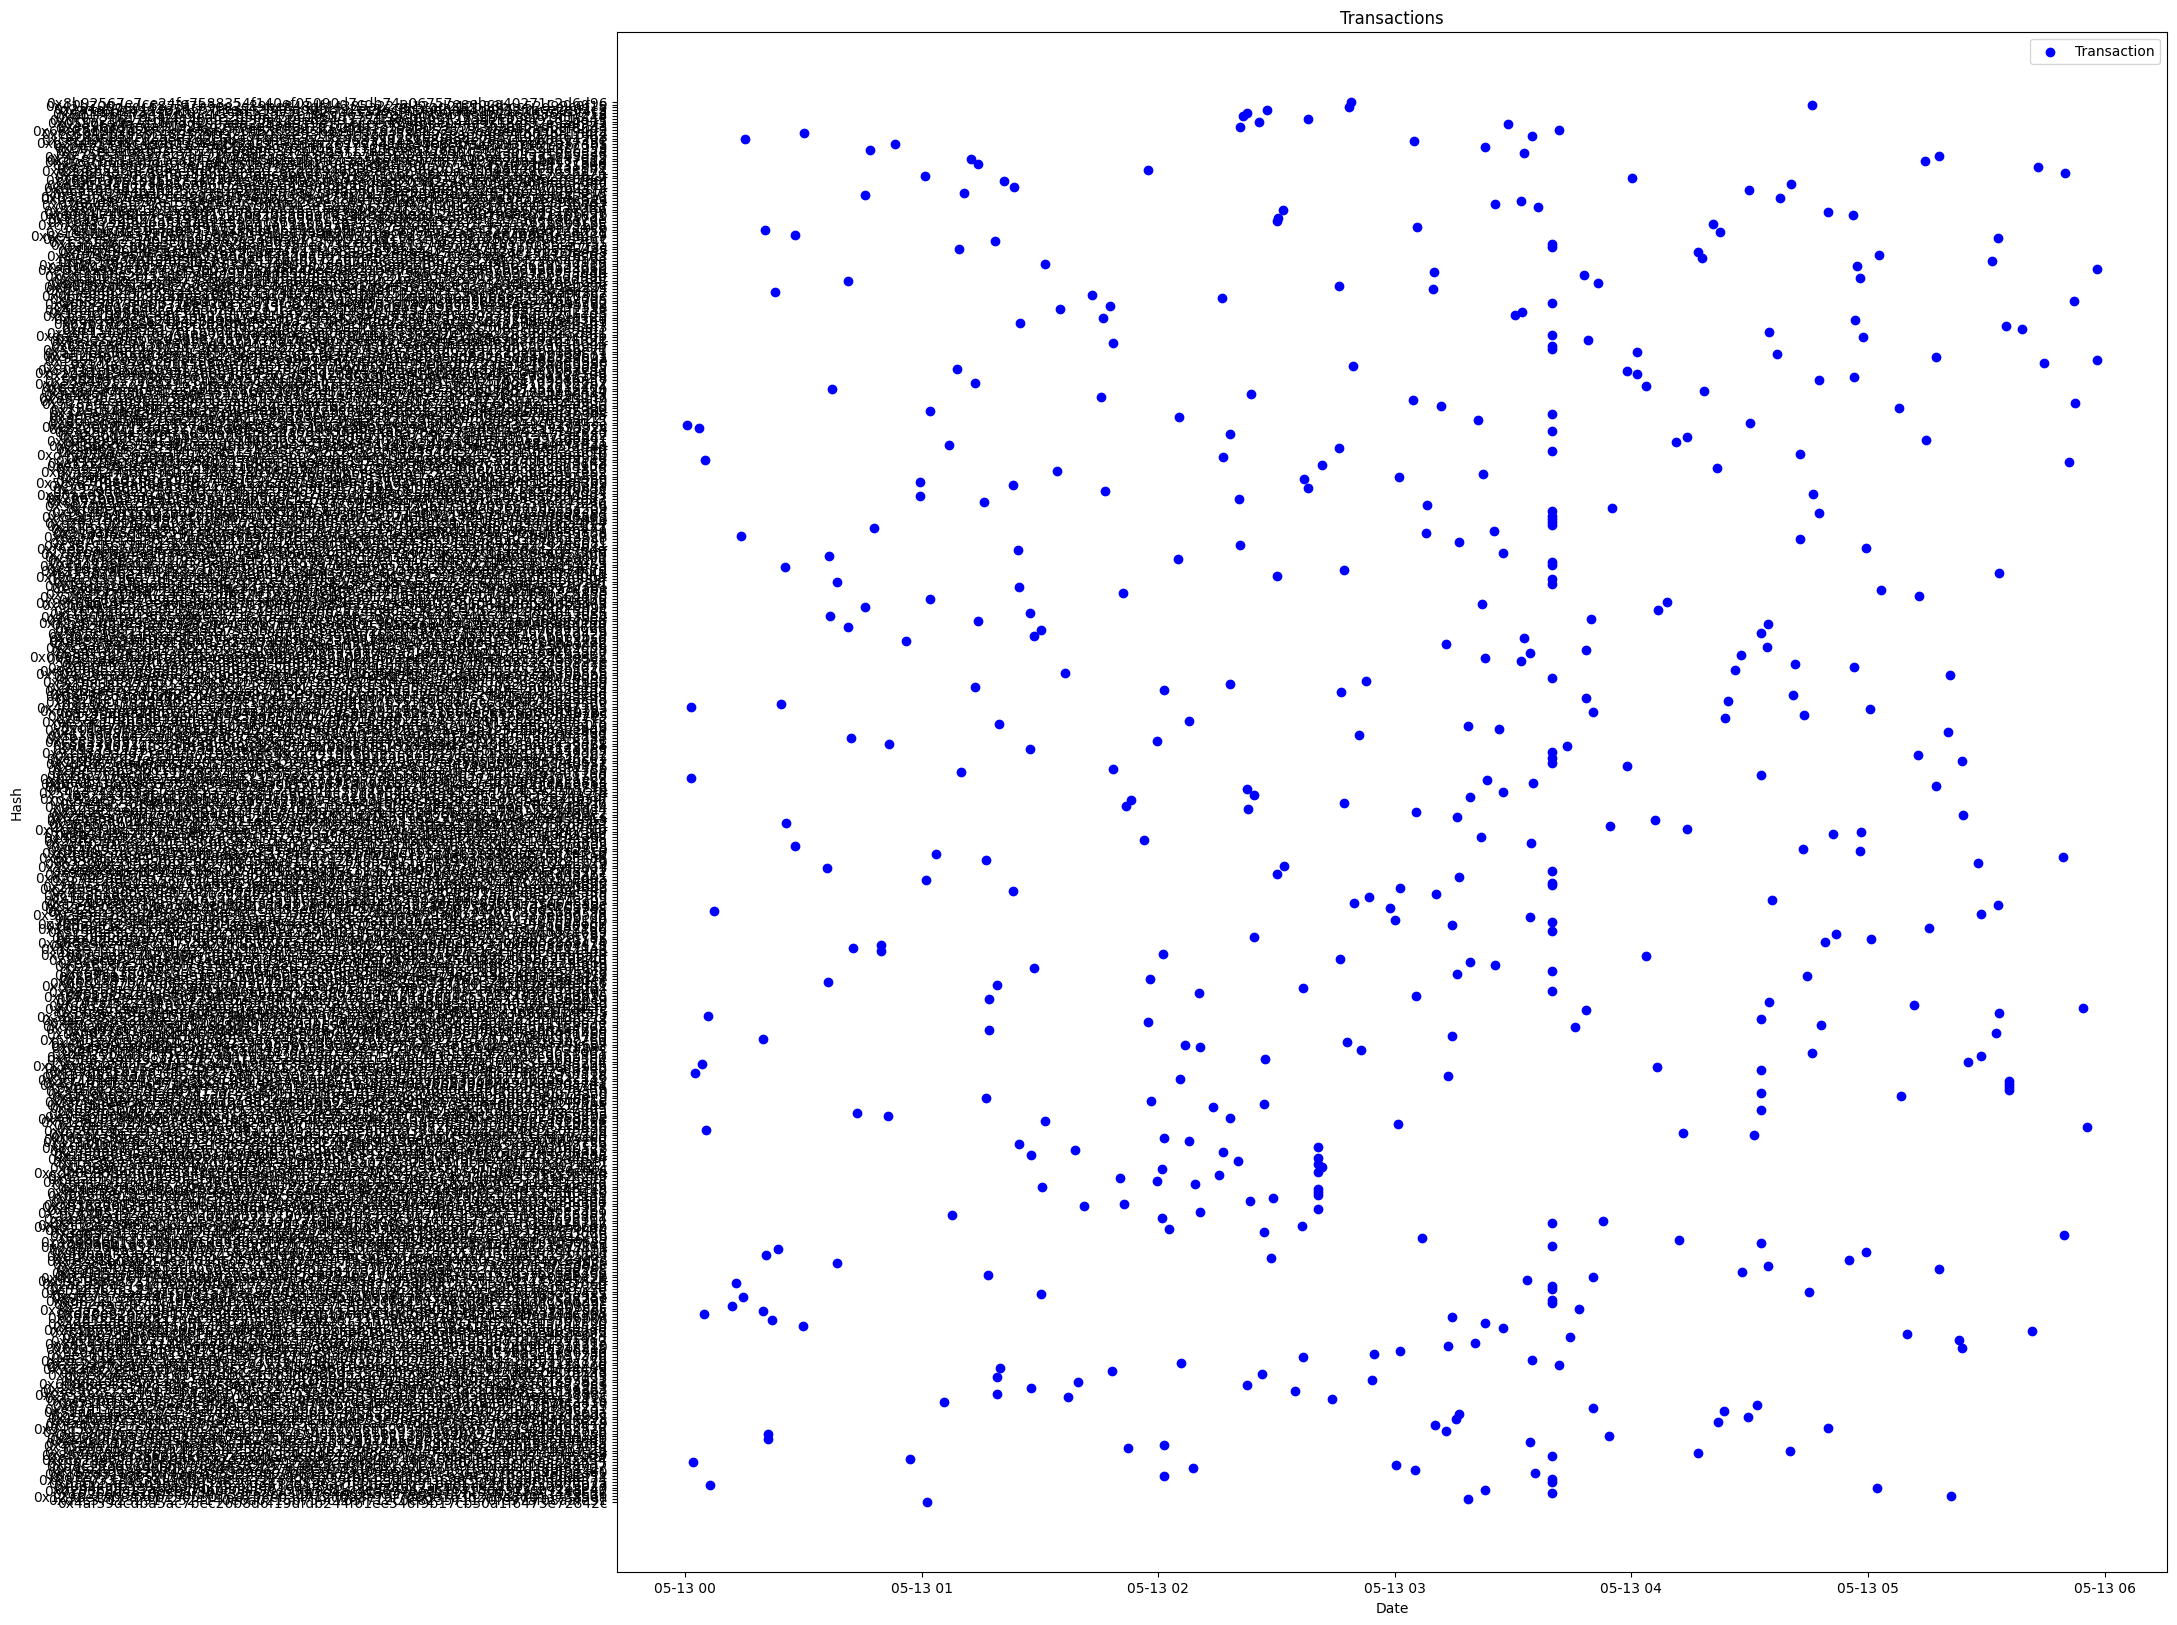

In [92]:
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])

plt.figure(figsize=(20, 20))

plt.scatter(
    x=new_df['block_timestamp'], 
    y = new_df['hash'], 
    label='Transaction', 
    color='blue')

plt.xlabel('Date')
plt.ylabel('Hash')
plt.title('Transactions')
plt.legend()

plt.show()

- age_of_addreses = diff entre 1st txn y dia de hoy
- total_Assets
- quality_of_held_assets: protocolos mas confiables 

addres_ideal: elegirla yo. y describirla.
arkham

1. definir los features de la ideal_Addresss.
2. buscar en Ethereum una base de datos con esas addresses.
3. buscar risky addresses por la misma cantidad.
4. feature engineering: evaluar el dataset: EDA. 
5. probar 4 modelos de clasificacion.
6. Presentar resultados con metricas 
7. Escribir la memoria.

## KAGGLE FRAUD DETECTION DATASET

In [126]:
#!pip install kaggle
# https://bobrupakroy.medium.com/ethereum-fraud-detection-ba4e1d8b262a

In [108]:
!kaggle datasets download -d rupakroy/ethereum-fraud-detection

Dataset URL: https://www.kaggle.com/datasets/rupakroy/ethereum-fraud-detection
License(s): CC0-1.0
100%|████████████████████████████████████████| 923k/923k [00:00<00:00, 1.90MB/s]
100%|████████████████████████████████████████| 923k/923k [00:00<00:00, 1.89MB/s]


In [125]:
data = pd.read_csv('transaction_dataset.csv')
data = data.iloc[:,2:]
data.columns = data.columns.str.replace(' ', '')
data

Address  FLAG  Avgminbetweensenttnx  \
0     0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0                844.26   
1     0x0002b44ddb1476db43c868bd494422ee4c136fed     0              12709.07   
2     0x0002bda54cb772d040f779e88eb453cac0daa244     0             246194.54   
3     0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0              10219.60   
4     0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0                 36.61   
...                                          ...   ...                   ...   
9836  0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2     1              12635.10   
9837  0xff718805bb9199ebf024ab6acd333e603ad77c85     1                  0.00   
9838  0xff8e6af02d41a576a0c82f7835535193e1a6bccc     1               2499.44   
9839  0xffde23396d57e10abf58bd929bb1e856c7718218     1                  0.00   
9840  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c     1              37242.70   

      Avgminbetweenreceivedtnx  TimeDiffbetweenfirstandlast(Mins)  Senttnx  \
0                      1093.71                          704785.63      721   
1                      2958.44                         1218216.73       94   
2                      2434.02                          516729.30        2   
3                     15785.09                          397555.90       25   
4                     10707.77                          382472.42     4598   
...                        ...                                ...      ...   
9836                    631.39                           58748.48        4   
9837                      0.00                               0.00        0   
9838                   2189.29                          261601.88       67   
9839                      0.00                               0.00        0   
9840                    149.56                          670817.33       18   

      ReceivedTnx  NumberofCreatedContracts  UniqueReceivedFromAddresses  \
0              89                         0                           40   
1               8                         0                            5   
2              10                         0                           10   
3               9                         0                            7   
4              20                         1                            7   
...           ...                       ...                          ...   
9836           13                         0                           11   
9837            0                         0                            0   
9838           43                         0                           31   
9839            1                         0                            1   
9840            3                         0                            1   

      UniqueSentToAddresses  ...  ERC20minvalsent  ERC20maxvalsent  \
0                       118  ...         0.000000     1.683100e+07   
1                        14  ...         2.260809     2.260809e+00   
2                         2  ...         0.000000     0.000000e+00   
3                        13  ...       100.000000     9.029231e+03   
4                        19  ...         0.000000     4.500000e+04   
...                     ...  ...              ...              ...   
9836                      4  ...         0.000000     0.000000e+00   
9837                      0  ...         0.000000     0.000000e+00   
9838                     44  ...         0.000000     0.000000e+00   
9839                      0  ...              NaN              NaN   
9840                      5  ...         0.000000     0.000000e+00   

      ERC20avgvalsent  ERC20minvalsentcontract  ERC20maxvalsentcontract  \
0       271779.920000                      0.0                      0.0   
1            2.260809                      0.0                      0.0   
2            0.000000                      0.0                      0.0   
3         3804.076893                      0.0                      0.0   
4        13726

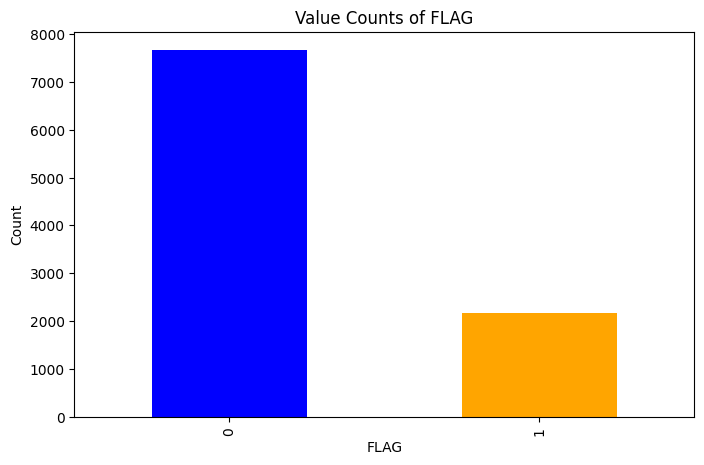

In [124]:
flag = data['FLAG'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
flag.plot(kind='bar', color=['blue', 'orange'])

# Adding titles and labels
plt.title('Value Counts of FLAG')
plt.xlabel('FLAG')
plt.ylabel('Count')

# Display the plot
plt.show()

In [5]:
import seaborn as sns
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from collections import Counter


In [6]:
dataset = pd.read_csv('transaction_dataset.csv',sep=",")
dataset = dataset.iloc[:,2:]
dataset.columns = dataset.columns.str.replace(' ', '')

In [7]:
dataset

Address  FLAG  Avgminbetweensenttnx  \
0     0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0                844.26   
1     0x0002b44ddb1476db43c868bd494422ee4c136fed     0              12709.07   
2     0x0002bda54cb772d040f779e88eb453cac0daa244     0             246194.54   
3     0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0              10219.60   
4     0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0                 36.61   
...                                          ...   ...                   ...   
9836  0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2     1              12635.10   
9837  0xff718805bb9199ebf024ab6acd333e603ad77c85     1                  0.00   
9838  0xff8e6af02d41a576a0c82f7835535193e1a6bccc     1               2499.44   
9839  0xffde23396d57e10abf58bd929bb1e856c7718218     1                  0.00   
9840  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c     1              37242.70   

      Avgminbetweenreceivedtnx  TimeDiffbetweenfirstandlast(Mins)  Senttnx  \
0                      1093.71                          704785.63      721   
1                      2958.44                         1218216.73       94   
2                      2434.02                          516729.30        2   
3                     15785.09                          397555.90       25   
4                     10707.77                          382472.42     4598   
...                        ...                                ...      ...   
9836                    631.39                           58748.48        4   
9837                      0.00                               0.00        0   
9838                   2189.29                          261601.88       67   
9839                      0.00                               0.00        0   
9840                    149.56                          670817.33       18   

      ReceivedTnx  NumberofCreatedContracts  UniqueReceivedFromAddresses  \
0              89                         0                           40   
1               8                         0                            5   
2              10                         0                           10   
3               9                         0                            7   
4              20                         1                            7   
...           ...                       ...                          ...   
9836           13                         0                           11   
9837            0                         0                            0   
9838           43                         0                           31   
9839            1                         0                            1   
9840            3                         0                            1   

      UniqueSentToAddresses  ...  ERC20minvalsent  ERC20maxvalsent  \
0                       118  ...         0.000000     1.683100e+07   
1                        14  ...         2.260809     2.260809e+00   
2                         2  ...         0.000000     0.000000e+00   
3                        13  ...       100.000000     9.029231e+03   
4                        19  ...         0.000000     4.500000e+04   
...                     ...  ...              ...              ...   
9836                      4  ...         0.000000     0.000000e+00   
9837                      0  ...         0.000000     0.000000e+00   
9838                     44  ...         0.000000     0.000000e+00   
9839                      0  ...              NaN              NaN   
9840                      5  ...         0.000000     0.000000e+00   

      ERC20avgvalsent  ERC20minvalsentcontract  ERC20maxvalsentcontract  \
0       271779.920000                      0.0                      0.0   
1            2.260809                      0.0                      0.0   
2            0.000000                      0.0                      0.0   
3         3804.076893                      0.0                      0.0   
4        13726

In [9]:
dataset.Address.value_counts()

Address
0x4cd526aa2db72eb1fd557b37c6b0394acd35b212    2
0x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f    2
0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1    2
0x4c24af967901ec87a6644eb1ef42b680f58e67f5    2
0x4c268c7b1d51b369153d6f1f28c61b15f0e17746    2
                                             ..
0x57b417366e5681ad493a03492d9b61ecd0d3d247    1
0x57bb2d6426fed243c633d0b16d4297d12bc20638    1
0x57c0cf70020f0af5073c24cb272e93e7529c6a40    1
0x57ccf2b7ffe5e4497a7e04ac174646f5f16e24ce    1
0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c    1
Name: count, Length: 9816, dtype: int64

In [10]:
dataset.ERC20_most_rec_token_type.value_counts()

ERC20_most_rec_token_type
0                        4399
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: count, Length: 466, dtype: int64

In [11]:
dataset.ERC20mostsenttokentype.value_counts()

ERC20mostsenttokentype
0                                                         4399
                                                          1191
EOS                                                        138
OmiseGO                                                    137
Golem                                                      130
                                                          ... 
BlockchainPoland                                             1
Covalent Token                                               1
Nebula AI Token                                              1
Blocktix                                                     1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name: count, Length: 304, dtype: int64

In [12]:
print(len(Counter(dataset.Address)))

def counts (data):
    counts = Counter(data)
    print(counts)
    print("length",len(counts))

9816


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Address                                         9841 non-null   object 
 1   FLAG                                            9841 non-null   int64  
 2   Avgminbetweensenttnx                            9841 non-null   float64
 3   Avgminbetweenreceivedtnx                        9841 non-null   float64
 4   TimeDiffbetweenfirstandlast(Mins)               9841 non-null   float64
 5   Senttnx                                         9841 non-null   int64  
 6   ReceivedTnx                                     9841 non-null   int64  
 7   NumberofCreatedContracts                        9841 non-null   int64  
 8   UniqueReceivedFromAddresses                     9841 non-null   int64  
 9   UniqueSentToAddresses                    

In [8]:
dataset.groupby(dataset.ERC20mostsenttokentype).mean()

TypeError: agg function failed [how->mean,dtype->object]

In [13]:
# Selecting only numerical columns
numerical_columns = dataset.select_dtypes(include=['number']).columns

# Performing groupby operation only on numerical columns
result = dataset.groupby(dataset.ERC20mostsenttokentype)[numerical_columns].mean()

# Display the result
result

FLAG  Avgminbetweensenttnx  \
ERC20mostsenttokentype                                           
                               0.000000           2133.128571   
                                1.000000           4561.208984   
$7RIP$                          0.000000           7777.280000   
''                              1.000000           1315.410000   
0                               0.000000           1933.012055   
...                                  ...                   ...   
iXledger                        0.000000           2146.910000   
minereum                        0.083333          14223.240833   
realchain                       0.000000           3250.980000   
tq2342.mjbsc.com Online casino  0.000000              5.350000   
vSlice                          0.000000          17771.010000   

                                Avgminbetweenreceivedtnx  \
ERC20mostsenttokentype                                     
                                            3810.957143   
                                             1541.202393   
$7RIP$                                       4139.900000   
''                                             17.330000   
0                                            8487.824201   
...                                                  ...   
iXledger                                     6523.280000   
minereum                                    15798.175000   
realchain                                    1387.430000   
tq2342.mjbsc.com Online casino                  2.210000   
vSlice                                       9322.190000   

                                TimeDiffbetweenfirstandlast(Mins)     Senttnx  \
ERC20mostsenttokentype                                                          
                                                    6.188482e+05  349.857143   
                                                     5.641052e+04    3.833753   
$7RIP$                                               1.479095e+06  146.000000   
''                                                   1.976578e+04   15.000000   
0                                                    1.047912e+05   48.057513   
...                                                           ...         ...   
iXledger                                             3.975908e+05   91.000000   
minereum                                             6.811513e+05   68.166667   
realchain                                            9.511604e+05  226.000000   
tq2342.mjbsc.com Online casino                       2.383873e+04  554.000000   
vSlice                                               3.222641e+05   38.000000   

                                ReceivedTnx  NumberofCreatedContracts  \
ERC20mostsenttokentype                                                  
                               1436.142857                  0.142857   
                                  27.218304                  0.022670   
$7RIP$                            83.000000                  2.000000   
''                                 2.000000                  3.000000   
0                                 47.613094                  0.753126   
...                                     ...                       ...   
iXledger                          31.000000                  0.000000   
minereum                           9.750000                  0.000000   
realchain                        156.000000                  0.000000   
tq2342.mjbsc.com Online casino  9446.000000                  0.000000   
vSlice                             3.500000                  0.000000   

                                UniqueReceivedFromAddresses  \
ERC20mostsenttokentype                                        
                                                138.142857   
                                                  14.207389   
$7RIP$                                            20.000000   
''                                                 2.000000   
0             

In [15]:
d = result
X = d.iloc[:,1:]
y =  d["FLAG"]
y = np.round(y).astype(int)
y.groupby(y).size()

FLAG
0    260
1     44
Name: FLAG, dtype: int64

In [16]:
#Class imbalance issue
X.isna().any()

Avgminbetweensenttnx                              False
Avgminbetweenreceivedtnx                          False
TimeDiffbetweenfirstandlast(Mins)                 False
Senttnx                                           False
ReceivedTnx                                       False
NumberofCreatedContracts                          False
UniqueReceivedFromAddresses                       False
UniqueSentToAddresses                             False
minvaluereceived                                  False
maxvaluereceived                                  False
avgvalreceived                                    False
minvalsent                                        False
maxvalsent                                        False
avgvalsent                                        False
minvaluesenttocontract                            False
maxvalsenttocontract                              False
avgvaluesenttocontract                            False
totaltransactions(includingtnxtocreatecontract  

/Users/sergiomarchena/miniforge3/envs/py39s/lib/python3.9/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


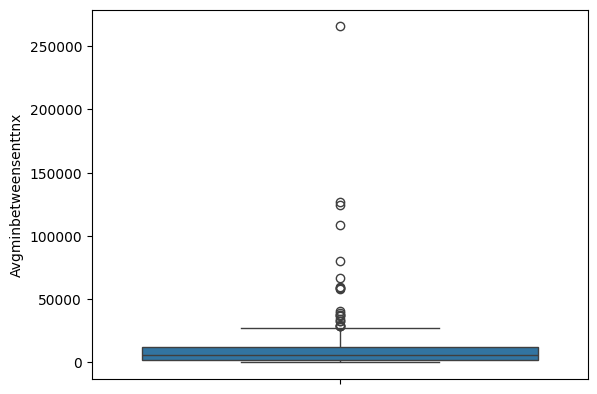

In [17]:
def outlier_dec(data):
    sns.boxplot(data)
    
outlier_dec(X.Avgminbetweensenttnx)

In [18]:
# Create correlation matrix
corr_matrix = X.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

/Users/sergiomarchena/miniforge3/envs/py39s/lib/python3.9/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/sergiomarchena/miniforge3/envs/py39s/lib/python3.9/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


<Axes: >

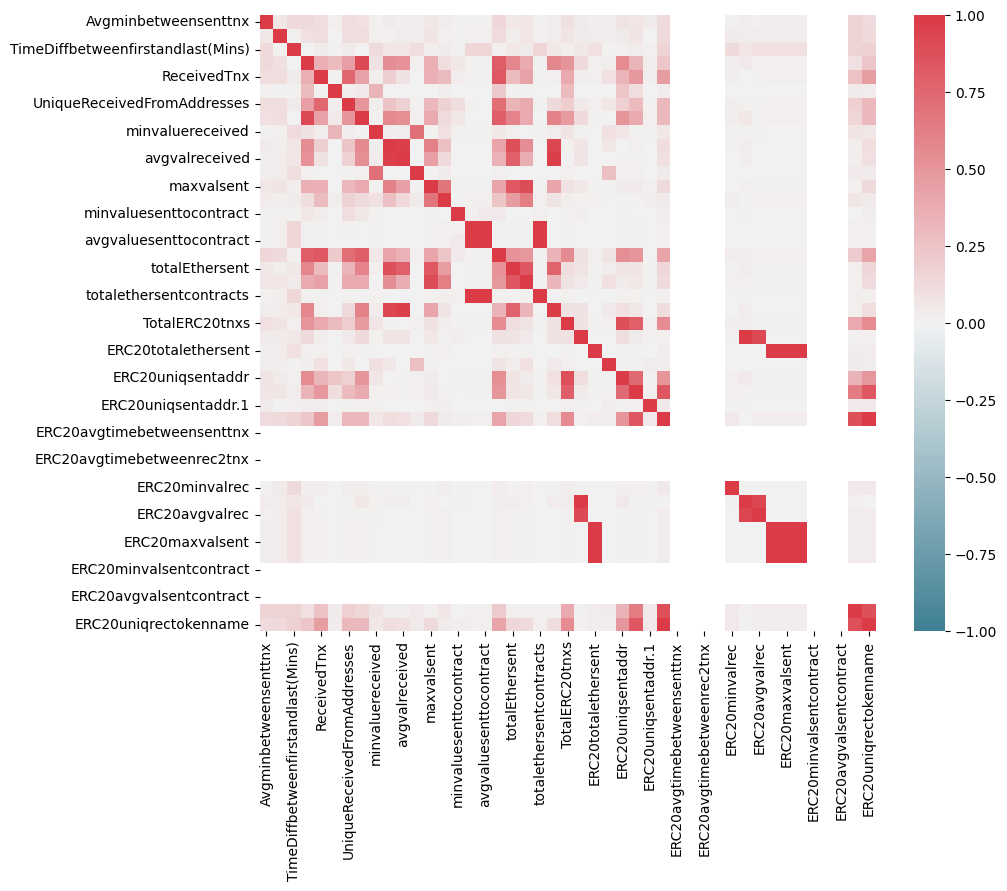

In [19]:
corr = corr_matrix
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True)

In [20]:
#------Remove the highly correlated variables----------------------
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
# Drop features 
X.drop(to_drop, axis=1, inplace=True)
#Drop columns that have 1 unique value -------------------------
X.loc[:,X.nunique()!=1]
X.drop(columns=X.columns[X.nunique()==1], inplace=True)
X = X.values

In [21]:
to_drop

['UniqueReceivedFromAddresses',
 'UniqueSentToAddresses',
 'avgvalreceived',
 'minvalsent',
 'avgvaluesenttocontract',
 'totaltransactions(includingtnxtocreatecontract',
 'totalEthersent',
 'totaletherreceived',
 'totalethersentcontracts',
 'totaletherbalance',
 'ERC20uniqsentaddr',
 'ERC20uniqrecaddr',
 'ERC20uniqreccontractaddr',
 'ERC20maxvalrec',
 'ERC20avgvalrec',
 'ERC20minvalsent',
 'ERC20maxvalsent',
 'ERC20avgvalsent',
 'ERC20uniqsenttokenname',
 'ERC20uniqrectokenname']

In [22]:
# METRICS


def evaluation_score (y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred) 
    print("Confusion Matrix \n", cm)
    print('Balanced Accuracy ',metrics.balanced_accuracy_score(y_test,y_pred))
    print("Recall Accuracy Score~TP",metrics.recall_score(y_test, y_pred))
    print("Precision Score ~ Ratio of TP",metrics.precision_score(y_test, y_pred))
    print("F1 Score",metrics.f1_score(y_test, y_pred))
    print("auc_roc score", metrics.roc_auc_score(y_test,y_pred))
    print("Classification Report", classification_report(y_test,y_pred))

def cross_validation(model,X_train,y_train,n):
    kfold = KFold(n_splits=10)  
    accuracies = cross_val_score(model,X= X_train,y= y_train,cv = kfold,scoring='accuracy')
    print("Standard Deviation",accuracies.std())
    print("Mean/Avergae Score",accuracies.mean())
    

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.40957295, -0.39199462,  0.06890977, ..., -0.06784518,
        -0.08232838, -0.09610325],
       [-0.29668081, -0.54395288, -1.62694692, ...,  3.43612911,
        -0.04976706, -0.01712806],
       [-0.14715151, -0.36997216,  2.66271837, ..., -0.06784518,
        -0.08232838, -0.09610644],
       ...,
       [-0.35759912, -0.55424782,  1.07089445, ..., -0.06784518,
        -0.08232838, -0.09610644],
       [-0.50850274, -0.64698719, -1.72515708, ..., -0.06784518,
        -0.08232838, -0.09610644],
       [ 0.31750098, -0.02302199, -0.82534767, ..., -0.06784518,
        -0.08232838, -0.04966002]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators= 150,max_depth=100)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0])

In [26]:
#Accuracy Score
evaluation_score(y_test, y_pred)
cross_validation(rf_model,X_train,y_train,10)

Confusion Matrix 
 [[79  5]
 [ 1  7]]
Balanced Accuracy  0.9077380952380952
Recall Accuracy Score~TP 0.875
Precision Score ~ Ratio of TP 0.5833333333333334
F1 Score 0.7000000000000001
auc_roc score 0.9077380952380952
Classification Report               precision    recall  f1-score   support

           0       0.99      0.94      0.96        84
           1       0.58      0.88      0.70         8

    accuracy                           0.93        92
   macro avg       0.79      0.91      0.83        92
weighted avg       0.95      0.93      0.94        92

Standard Deviation 0.04486527957780503
Mean/Avergae Score 0.9103896103896105


In [27]:
#----------- WITH SMOTE
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (212, 18)
Number transactions y_train dataset:  (212,)
Number transactions X_test dataset:  (92, 18)
Number transactions y_test dataset:  (92,)


In [3]:
#!pip install -U imbalanced-learn

In [29]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 36
Before OverSampling, counts of label '0': 176 



In [30]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2,sampling_strategy=1) 

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))



After OverSampling, the shape of train_X: (352, 18)
After OverSampling, the shape of train_y: (352,) 

After OverSampling, counts of label '1': 176
After OverSampling, counts of label '0': 176


/var/folders/3q/f_c12djx2yxc8v2vq4255gcm0000gn/T/ipykernel_97446/2405683070.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


In [31]:

def train_model(n,max_d):
    rf_model = RandomForestClassifier(n_estimators=n,max_depth=max_d)
    rf_model.fit(X_train_res,y_train_res.ravel())
    predictions = rf_model.predict(X_test)
    return predictions
def show_predictions(data):
    results = rf_model.predict(data)
    return results 
    
    

In [32]:
train_model_predictions = train_model(500,100)
#Accuracy Score--------------------------------------
evaluation_score(y_test, train_model_predictions)
cross_validation(rf_model,X_train,y_train,10)


Confusion Matrix 
 [[75  9]
 [ 1  7]]
Balanced Accuracy  0.8839285714285714
Recall Accuracy Score~TP 0.875
Precision Score ~ Ratio of TP 0.4375
F1 Score 0.5833333333333334
auc_roc score 0.8839285714285715
Classification Report               precision    recall  f1-score   support

           0       0.99      0.89      0.94        84
           1       0.44      0.88      0.58         8

    accuracy                           0.89        92
   macro avg       0.71      0.88      0.76        92
weighted avg       0.94      0.89      0.91        92

Standard Deviation 0.039488967729805056
Mean/Avergae Score 0.9103896103896103


In [33]:
#Select the best model------------------------------------------
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['random_forest'] = RandomForestClassifier()
    models['bayes'] = GaussianNB()
    return models

In [34]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.898 (0.042)
>knn 0.886 (0.044)
>cart 0.862 (0.066)
>svm 0.863 (0.037)
>random_forest 0.913 (0.043)
>bayes 0.398 (0.072)


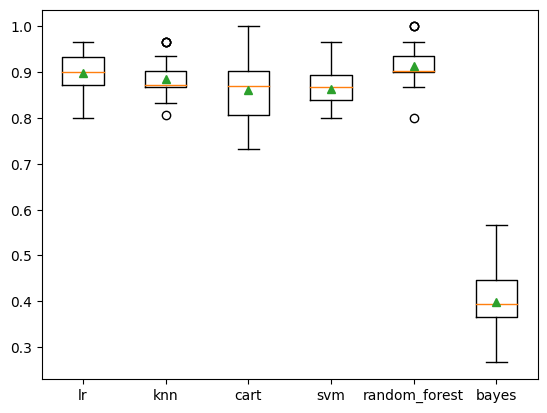

best accuracy , best_paramters 0.9242424242424242 {'max_depth': 10, 'n_estimators': 100}
Confusion Matrix 
 [[71 13]
 [ 1  7]]
Balanced Accuracy  0.8601190476190477
Recall Accuracy Score~TP 0.875
Precision Score ~ Ratio of TP 0.35
F1 Score 0.4999999999999999
auc_roc score 0.8601190476190477
Classification Report               precision    recall  f1-score   support

           0       0.99      0.85      0.91        84
           1       0.35      0.88      0.50         8

    accuracy                           0.85        92
   macro avg       0.67      0.86      0.71        92
weighted avg       0.93      0.85      0.87        92

Standard Deviation 0.05241895154915553
Mean/Avergae Score 0.9196969696969697


In [35]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()
#GridSeachCV -----
from sklearn.model_selection import GridSearchCV
p = [{'n_estimators':[50,100,150],'max_depth':[10, 100]}]
'''p = [{'n_estimators':[50,100,150],'max_depth':[10, 100],
               'min_samples_split':[2,3,4,5,6,7,8,9,10],'min_samples_leaf':[2,3,4,5],
               'min_impurity_decrease':[2,3,4,5],'max_features':["auto","sqrt","log2"]}]'''
grid_search = GridSearchCV(estimator = rf_model,param_grid= p, scoring = "accuracy",cv=10,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("best accuracy , best_paramters", best_accuracy, best_parameters)
#-------------------------------------------
train_model_predictions1= train_model(100,10)
#Accuracy Score
evaluation_score(y_test, train_model_predictions1)
cross_validation(rf_model,X_train,y_train,10)
#show_predictions(new_data)

In [36]:
dataset

Address  FLAG  Avgminbetweensenttnx  \
0     0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0                844.26   
1     0x0002b44ddb1476db43c868bd494422ee4c136fed     0              12709.07   
2     0x0002bda54cb772d040f779e88eb453cac0daa244     0             246194.54   
3     0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0              10219.60   
4     0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0                 36.61   
...                                          ...   ...                   ...   
9836  0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2     1              12635.10   
9837  0xff718805bb9199ebf024ab6acd333e603ad77c85     1                  0.00   
9838  0xff8e6af02d41a576a0c82f7835535193e1a6bccc     1               2499.44   
9839  0xffde23396d57e10abf58bd929bb1e856c7718218     1                  0.00   
9840  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c     1              37242.70   

      Avgminbetweenreceivedtnx  TimeDiffbetweenfirstandlast(Mins)  Senttnx  \
0                      1093.71                          704785.63      721   
1                      2958.44                         1218216.73       94   
2                      2434.02                          516729.30        2   
3                     15785.09                          397555.90       25   
4                     10707.77                          382472.42     4598   
...                        ...                                ...      ...   
9836                    631.39                           58748.48        4   
9837                      0.00                               0.00        0   
9838                   2189.29                          261601.88       67   
9839                      0.00                               0.00        0   
9840                    149.56                          670817.33       18   

      ReceivedTnx  NumberofCreatedContracts  UniqueReceivedFromAddresses  \
0              89                         0                           40   
1               8                         0                            5   
2              10                         0                           10   
3               9                         0                            7   
4              20                         1                            7   
...           ...                       ...                          ...   
9836           13                         0                           11   
9837            0                         0                            0   
9838           43                         0                           31   
9839            1                         0                            1   
9840            3                         0                            1   

      UniqueSentToAddresses  ...  ERC20minvalsent  ERC20maxvalsent  \
0                       118  ...         0.000000     1.683100e+07   
1                        14  ...         2.260809     2.260809e+00   
2                         2  ...         0.000000     0.000000e+00   
3                        13  ...       100.000000     9.029231e+03   
4                        19  ...         0.000000     4.500000e+04   
...                     ...  ...              ...              ...   
9836                      4  ...         0.000000     0.000000e+00   
9837                      0  ...         0.000000     0.000000e+00   
9838                     44  ...         0.000000     0.000000e+00   
9839                      0  ...              NaN              NaN   
9840                      5  ...         0.000000     0.000000e+00   

      ERC20avgvalsent  ERC20minvalsentcontract  ERC20maxvalsentcontract  \
0       271779.920000                      0.0                      0.0   
1            2.260809                      0.0                      0.0   
2            0.000000                      0.0                      0.0   
3         3804.076893                      0.0                      0.0   
4        13726